# A/B TESTING - Adobe Creative Cloud

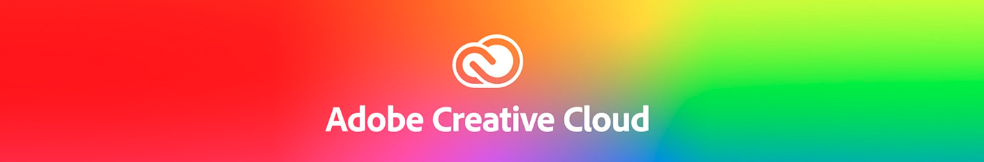

**Adobe Creative Cloud** is a set of applications and services from Adobe Corporation that gives subscribers access to a collection of software used for graphic design, video editing, web development, photography, along with a set of mobile applications and also some optional cloud services. In Creative Cloud, a monthly or annual subscription service is delivered over the Internet.

**Company approach:** Users can download and use ACC for one month absolutely free. However, once the free trial ends, they are required to pay for a license to continue using their services. The company is trying to encourage more people to purchase their subscription, regardless of its duration: monthly or annual. 

**Goal:** To increase the number of subscriptions, the company wants to try out some changes in the present layout of the homepage - they want to emphasize more on the free trial option. The hope is that this will encourage more people to download and use the software initially for free and when they find the usability of the product they might consider to acquire a subscription.

Through this notebook, I will perform an experiment to test whether the company should fully deploy this change or not: *Changes in the homepage will encourage more people to download the software and, eventually, acquiring a license (monthly/annual)*

-----
## USER FUNNEL

Before jumping straight into the code, it is important to understand how the user funnel works for Adobe Cloud Services. This means, in other words, to understand the steps you normally expect a user will take while visiting the website.

1. Access to the Adobe Creative Cloud homepage
2. Sign up / Sign in
3. Download ACC Services
4. Once the free trial expires, the software takes the user back to the subscription/license website.
5. User sucessfully subscribes to ACC

*Disclaimer:* There will be potential dropoffs in the users who move from one step to the next step in the funnel with only a few making it to the end. That means the probability decreases as you go down in the user funnel. Also, the above user funnel is not a unique set of paths/steps taken by every user visiting that page, e.g., a user might take some additional steps between any two consecutive steps shown above.



-----
## DEFINING METRICS: Invariant Metrics & North Star Metrics

Once we fully understand the business funnel, it is important to define one single metric or multiple metrics for the experiment. In the evaluation of the metric, we establish what change in that metric would be practically significant. These metrics will show us whether our experiment group is better than our control group or not.


1. **Invariant Metric or Sanity Check:** Metrics that should not change across your experiment or control group. This metric ensures that the two groups on which we are conducting the experiment are equivalent In this case I will check how similar the cookie distribution is between the control and experiment groups, ensuring that the observed difference in the behavior between the two groups are only due to the changes introduced.

\begin{equation*}
Number \: of \: Cookies \end{equation*}


2. **North Star Metric:** These metrics will be used to evaluate the performance of the experiment. For the purpose of this experiment, I will be focusing on two: **Download Rate and Purchase Rate**. Calculations are presented below:


\begin{equation*}
Download \: Rate \: (DR) = \frac{Number \: of \: downloads}{Number \: of \: cookies} \end{equation*}


\begin{equation*}
Purchase \: Rate \: (PR) = \frac{Number \: of \: purchases}{Number \: of \: cookies}
\end{equation*}


*Disclaimer:* It is always a good idea to use ratios as metrics instead of absolute number. Even though we assume the number of cookies assigned to each group to be same, in reality there would be slight imbalance between the two groups.


-----
## Experiment Size - Confidence Level - Power of Test 

Before running the experiment, it is important to check the experiment size and to define the confidence level and test power expected. Based on historical data:

* **3250 avg visitors per day**
* **520 avg downloads per day (which represents a download rate equals to 0.16)**
* **65 licenses purchased on avg per day (which represents a purchase rate equals to 0.02)**


### GOAL 1: Increase 50 downloads per day

Let's suppose it is expected an increase of 50 downloads per day: a download rate of 0.175. What is the minimum runtime of the experiment to collect sufficient amount of data to detect a 1.5 pp increase in the DR? Let's define a **significance level of 0.05** (error type I) and a **power of the test of 0.80**

Experiment size calculation

\begin{equation*}
Experiment \: Size = \big[\big(\frac{Z_{1-\alpha}S_{0}-Z_{\beta}S_{1}}{P_1 - P_0}\big)\big]
\end{equation*}

<br/>

$P_1 - P_0$ : Minimum detectable effect *eg.* increment in the download rate <br/>
$S_0$ : Standard Deviation of the control group  <br/>
$S_1$ : Standard Deviation of the experiment group  <br/>
$Z_{1-\alpha}$ : z-score of the control group at $1-\alpha$ <br/>
$Z_{\beta}$ : z-score of the experiment group at $\beta$ <br/>

Considering the significance level and power, let's proceed to the calculation

$P_1 - P_0$ = 0.175 - 0.16 = 0.015 <br/>

$\alpha \equiv$ type I error rate = 0.025 (since overall ${\alpha}$ should be 5%, applying Bonferroni correction to the type I error for both tests gives a value of 0.025) <br/>

$\beta$ = 1 - power = 1 - 0.8 = 0.2 <br/>

$S_0 = \sqrt{ \left( P_0 (1 - P_0) \right) +  \left( P_0 (1 - P_0) \right)}$ <br/>

$S_1 = \sqrt{ \left( P_0 (1 - P_0) \right) +  \left( P_1 (1 - P_1) \right)}$ <br/>

After running all calculations, the **minimum sample size $n = 9481$** is required for this effect to show up in the A/B Test. Based on historical data, there are on avg 3250 unique visitors per day, therefore 1625 unique visitors per group per day. Thus, in order to be able to collect the required amount of data, **we need to run our experiment to detect a 1.5 pp increase in the download rate for 9.481/1.625 = 6 days.**



### GOAL 2: Increase 10 subscriptions (purchase) per day

If the goal is to increase 10 subscriptions per day *(PR 0.020 to 0.023)*, let's define the **minimum size and runtime of the experiment** to collect sufficient amount of data to **detect 0.03 pp increase in the PR**, with ${\alpha}$ = 5% and 80% power?

Following the exact same steps as presented above, to detect a 0.03% increase in the purchase rate, the experiment needs to run for **34.930/1.625 = 21 days.**

*Disclaimer:* Users might not return immediately after the one month free trial period to purchase the software. So we will run our experiment for about one week longer.

----

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy as sp

import scipy.stats as stats

##### There are 3 variables for control and experiment: cookies, downloads and purchases 

In [2]:
df = pd.read_csv('homepage-experiment-data.csv')
df.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


## INVARIANT METRIC: Cookies - Defining H0 & H1

Before running the actual experiment, we need to make sure that the two groups are comparable. In other words, the invariant metric should be same for both the groups.

\begin{equation*}
H_0 : Cookies\: Control = Cookies\: Experiment \\
H_1 : Cookies\: Control \neq Cookies\: Experiment
\end{equation*}

In [3]:
# Check the avg values for both: Treatment and control group

avg_control_cookies = df['Control Cookies'].mean()
avg_experiment_cookies = df['Experiment Cookies'].mean()

print('Avg control cookies: {} \nAvg experiment cookies: {}'.format(avg_control_cookies, avg_experiment_cookies))

Avg control cookies: 1615.551724137931 
Avg experiment cookies: 1632.6206896551723


In [4]:
print(f'Avg control cookies: {avg_control_cookies} \nAvg experiment cookies: {avg_experiment_cookies}')

Avg control cookies: 1615.551724137931 
Avg experiment cookies: 1632.6206896551723


In [5]:
diff_avg_cookies = avg_experiment_cookies - avg_control_cookies
diff_avg_cookies

17.068965517241395

In [6]:
# 29 days when we need 6 days for DR and 21 for PR. So we are in good shape to run the experiment.

df.shape

(29, 7)

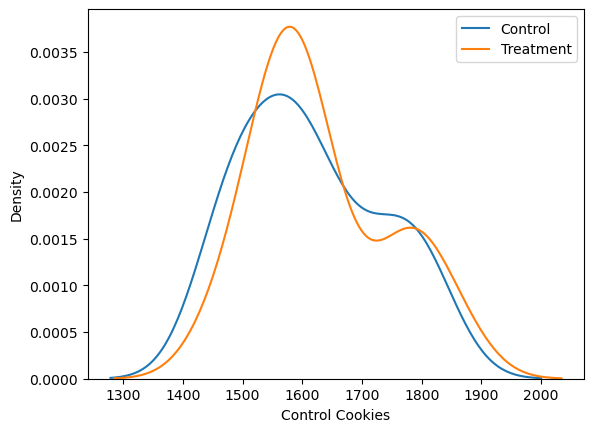

In [11]:
# Let's plot both distributions: control and treatment - We can see that they are pretty much overlapping.

sns.kdeplot(df['Control Cookies'])
sns.kdeplot(df['Experiment Cookies'])
plt.legend(['Control', 'Treatment'])
plt.show()

In [7]:
# Bootstrap the sample we have

np.random.seed(22)
diffs =[]
for i in range(10000):
    df_sample = df.sample(df.shape[0], replace=True)
    avg_control_cookies = df_sample['Control Cookies'].mean()
    avg_experiment_cookies = df_sample['Experiment Cookies'].mean()
    avg_diff_cookies = avg_experiment_cookies - avg_control_cookies
    diffs.append(avg_diff_cookies)
    
diffs

[28.689655172413723,
 2.9655172413793025,
 19.551724137930933,
 34.17241379310326,
 47.72413793103442,
 6.068965517241168,
 31.41379310344837,
 6.82758620689674,
 16.689655172413723,
 16.655172413793025,
 12.034482758620697,
 5.3793103448276725,
 22.965517241379303,
 5.72413793103442,
 24.965517241379303,
 11.034482758620697,
 0.17241379310348748,
 29.724137931034647,
 13.758620689655118,
 -9.758620689655118,
 22.965517241379303,
 10.620689655172555,
 -4.6206896551723275,
 12.13793103448279,
 10.13793103448279,
 58.10344827586209,
 38.27586206896558,
 20.55172413793116,
 20.103448275862092,
 19.31034482758605,
 -4.724137931034647,
 23.103448275862092,
 21.413793103448143,
 22.86206896551721,
 4.517241379310235,
 24.13793103448279,
 33.931034482758605,
 8.965517241379303,
 12.241379310344882,
 17.655172413793252,
 33.9655172413793,
 23.58620689655163,
 5.13793103448279,
 17.931034482758605,
 6.482758620689538,
 16.103448275862092,
 24.620689655172328,
 6.13793103448279,
 -7.965517241379

In [10]:
# List to np.array for further calculations 

bootstrap_cookies = np.array(diffs)
obs_avg = bootstrap_cookies.mean()
print(f'Bootstrap diff cookies avg: {obs_avg}\nSample diff coofies avg: {diff_avg_cookies}')

Bootstrap diff cookies avg: 17.09796206896552
Sample diff coofies avg: 17.068965517241395


In [12]:
# Defining confidence interval limits based on the bootstrap approach
l_ci = np.quantile(bootstrap_cookies, 0.025)
u_ci = np.quantile(bootstrap_cookies, 0.975)

print(f'Confidence Internval: {l_ci}, {u_ci}')

# Includes zero, we can consider in advance that the p_value > significance level

Confidence Internval: -6.105172413793126, 40.24310344827566


Bootstrap mean: 17.09796206896552
Confidence Internval: -6.105172413793126, 40.24310344827566


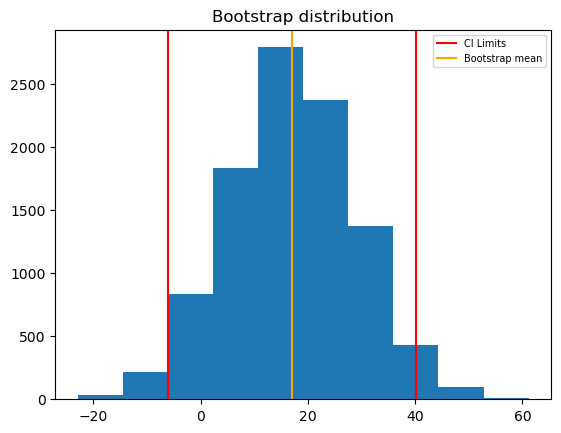

In [37]:
# Let's plot the distribution 

plt.hist(bootstrap_cookies)
plt.axvline(l_ci, color='red')
plt.axvline(bootstrap_cookies.mean(), color='orange')
plt.axvline(u_ci, color='red')
plt.title('Bootstrap distribution')
print(f'Bootstrap mean: {bootstrap_cookies.mean()}\nConfidence Internval: {l_ci}, {u_ci}')
plt.legend(['CI Limits', 'Bootstrap mean'], prop={'size':7})
plt.show()

### INSIGHT

With the confidence interval provided above, we can already infere that there are no significant difference between both groups for the invariant metric **(good news!).** In other words, we can't reject the null hypothesis:

\begin{equation*}
H_0 : Cookies\: Control = Cookies\: Treatment \\
\end{equation*}

Therefore, assuming that $H_0$ is true, we can look at the sampling distribution of the difference in average number of cookies between the groups. The mean of this distribution should be at 0 (as there is no difference between both groups) and the standard deviation is same as the bootstrapped sample. We can then draw samples from a normal distribution with the specified mean and standard deviation.

In [19]:
# Defining mean and std for H0
h0_mean = 0
h0_std = bootstrap_cookies.std()

# Generating the sample from normal distribution
h0_sample = np.random.normal(loc=h0_mean, scale = h0_std, size = bootstrap_cookies.size)
h0_sample

array([  2.52545417,  -1.93255579, -22.3359554 , ...,  13.12914489,
         2.09433907,  10.12924679])

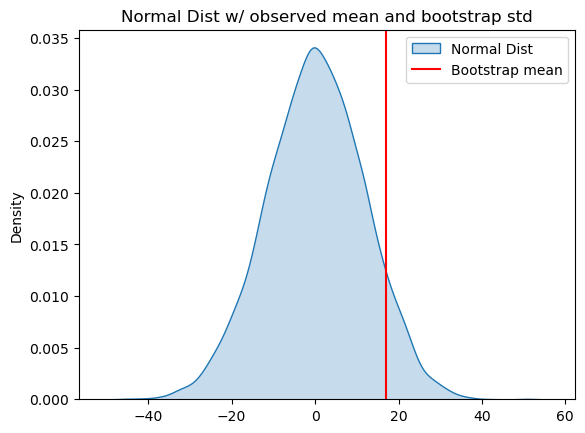

In [54]:
# Let's plot it

sns.kdeplot(h0_sample, fill= True)
plt.axvline(obs_avg, color='red')
plt.title('Normal Dist w/ observed mean and bootstrap std')
plt.legend(['Normal Dist','Bootstrap mean'])
plt.show()

In [39]:
upper_lim = obs_avg
lower_lim = h0_mean - (obs_avg-h0_mean)
p_value = (h0_sample > upper_lim).mean() + (h0_sample < lower_lim).mean()

print(f'P-value: {p_value} which is greater than 0.05, thus we fail to reject H0')

P-value: 0.1497 which is greater than 0.05, thus we fail to reject H0


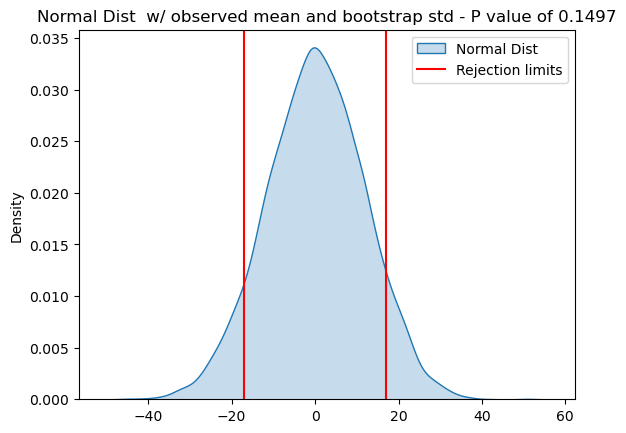

In [56]:
sns.kdeplot(h0_sample, fill= True)
plt.axvline(upper_lim, color='red')
plt.axvline(lower_lim, color='red')
plt.title(f'Normal Dist  w/ observed mean and bootstrap std - P value of {p_value}')
plt.legend(['Normal Dist','Rejection limits'])
plt.show()

### CONCLUSION

The p-value of the test is given by the sum of the areas below and above the lower and upper red vertical lines respectively.

As previously mentioned: p_value  > 𝛼, we fail to reject the null hypothesis. In other words, the difference in the average number of cookies between two groups is not statistically significant. Therefore, the two groups are comparable and we can proceed to evaluate the evaluation metrics. **Good news x2** 

----
# Evaluation Metric: Download Rate

Let's test the following scenario:

\begin{equation*}
H_0 : DownloadRate\: Treatment <= DownloadRate\: Control \\
H_1 : DownloadRate\: Treatment > DownloadRate\: Control
\end{equation*}

In [57]:
df.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


In [59]:
avg_control_dr = df['Control Downloads'].sum()/df['Control Cookies'].sum()
avg_experiment_dr = df['Experiment Downloads'].sum()/df['Experiment Cookies'].sum()

print(f'Control Download Rate: {avg_control_dr} \nExperiment Download Rate: {avg_experiment_dr}')

Control Download Rate: 0.16123455209067042 
Experiment Download Rate: 0.180543234908968


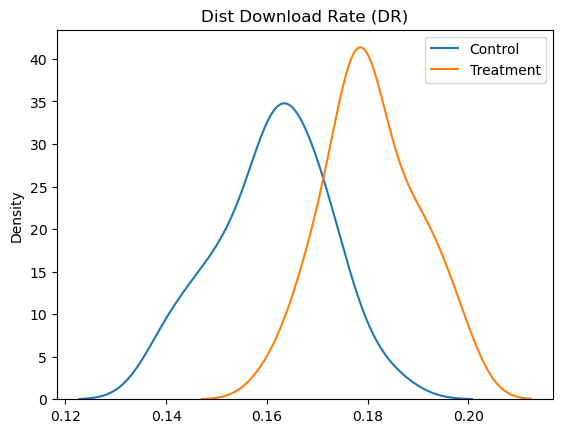

In [63]:
sns.kdeplot(df['Control Downloads']/df['Control Cookies'])
sns.kdeplot(df['Experiment Downloads']/df['Experiment Cookies'])
plt.legend(['Control', 'Treatment'])
plt.title('Dist Download Rate (DR)')
plt.show()

In [60]:
# Bootstrap

diffs = []

for i in range(10000):
    df_sample = df.sample(df.shape[0], replace=True)
    control_dr_sample = df_sample['Control Downloads'].sum()/df_sample['Control Cookies'].sum()
    experiment_dr_sample = df_sample['Experiment Downloads'].sum()/df_sample['Experiment Cookies'].sum()
    diffs.append(experiment_dr_sample - control_dr_sample)
    
diffs

[0.021772908357458987,
 0.018249858370655514,
 0.017544104769647434,
 0.021251353764259517,
 0.014225012449967434,
 0.016785905233311194,
 0.020874427775541382,
 0.020053127611956073,
 0.016260602405790497,
 0.012292127179150347,
 0.02357447534594259,
 0.02269505170682054,
 0.019071267373796608,
 0.016466551632826787,
 0.01873609796738851,
 0.01731240490604888,
 0.021748820287412984,
 0.019918621878499992,
 0.020138028150948173,
 0.013534661450614827,
 0.023673226542287623,
 0.015681394343242977,
 0.018631077733816198,
 0.023072534067869604,
 0.01958331883167702,
 0.024913706491109106,
 0.018984331976928448,
 0.020025043480255245,
 0.01882266804929547,
 0.019293605928512286,
 0.021359851947437614,
 0.021481676181725473,
 0.01857381085459689,
 0.01737182495633438,
 0.022051983694317545,
 0.022088565118708076,
 0.021871202448979443,
 0.0177420460924764,
 0.0220357382132243,
 0.018445547683144575,
 0.020996823438102774,
 0.01962409657655398,
 0.019184399688212284,
 0.024207670737413728,
 

In [61]:
# List to array for further calculations

bootstrap_dr = np.array(diffs)
bootstrap_dr

array([0.02177291, 0.01824986, 0.0175441 , ..., 0.01744421, 0.0224203 ,
       0.01188749])

Bootstrap Mean: 0.01928566176505143
Confidence Interval: (0.014223222223109592, 0.02433297478246022)


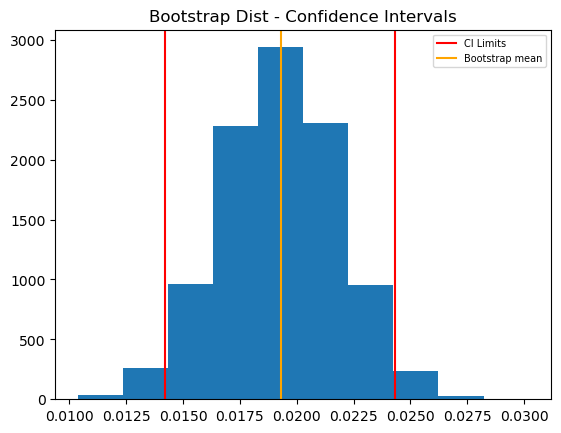

In [69]:
# Defining lower and upper confidence interval limits.
l_ci = np.quantile(bootstrap_dr, 0.025) 
u_ci = np.quantile(bootstrap_dr, 0.975)

# Plotting
plt.hist(bootstrap_dr)
plt.axvline(l_ci, color='red')
plt.axvline(bootstrap_dr.mean(), color='orange')
plt.axvline(u_ci, color='red')
plt.title('Bootstrap Dist - Confidence Intervals')
plt.legend(['CI Limits', 'Bootstrap mean'], prop={'size':7})
print(f'Bootstrap Mean: {bootstrap_dr.mean()}\nConfidence Interval: {l_ci, u_ci}')
plt.show()

### INSIGHT

With the confidence interval provided above, we can already infere that there is a significance difference between both groups for the evaluation metric. **In other words, we will reject the null hypothesis:**

\begin{equation*}
H_0 : DownloadRate\: Experiment <= DownloadRate\: Control \\
\end{equation*}

Therefore, rejecting the idea that $H_0$ is true, we can look at the sampling distribution of the difference in average download rate between the groups. The mean of this distribution should be at 0 (as there is no difference between both groups) and the standard deviation is same as the bootstrapped sample. The bootstrap mean should be quite off regarding the normal distribution with mean 0 (as we expect significant difference)

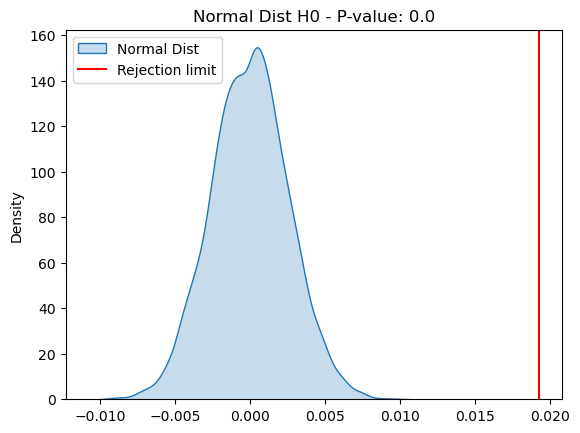

In [75]:
# Setting up variables to prove significant difference against H0 normal distribution with mean 0 and bootstrap std
obs_mean = bootstrap_dr.mean()
h0_mean = 0
h0_std = bootstrap_dr.std()

# Generating the sample
h0_sample = np.random.normal(loc=h0_mean, scale = h0_std, size = bootstrap_dr.size)
upper_lim = obs_mean
p_value = (h0_sample > upper_lim).mean()

# Generating the plot
sns.kdeplot(h0_sample, fill=True)
plt.axvline(upper_lim, color='red')
plt.title(f'Normal Dist H0 - P-value: {p_value}')
plt.legend(['Normal Dist','Rejection limit'])
plt.show()

### CONCLUSION

It is clear from the above plot that the p-value of the test falls well below the statistical significance bound (alpha) and hence we can reject the null hypothesis in favor of the alternative. 

**In other words, the increment in the download rate due to the modifications introduced in the homepage of the website is statistically significant.**

---
# Evaluation Metric: Purchase Rate

Let's test the following scenario:

\begin{equation*}
H_0 : PurchaseRate\: Treatment <= PurchaseRate\: Control \\
H_1 : PurchaseRate\: Treatment > PurchaseRate\: Control
\end{equation*}

In [76]:
df.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


In [77]:
avg_control_pr = df['Control Licenses'].sum()/df['Control Cookies'].sum()
avg_experiment_pr = df['Experiment Licenses'].sum()/df['Experiment Cookies'].sum()

print(f'Avg Control Purchase Rate: {avg_control_pr} \nAvg Experimentation Purchase Rate: {avg_experiment_pr}')
print('Difference: ',avg_experiment_pr-avg_experiment_dr, 'pp')

Avg Control Purchase Rate: 0.01515442573264178 
Avg Experimentation Purchase Rate: 0.015460651374984159
Difference:  -0.16508258353398386 pp


In [78]:
# Bootstrap

diff = []
for i in range(10000):
    df_sample = df.sample(df.shape[0], replace=True)
    bt_avg_control_pr = df_sample['Control Licenses'].sum()/df_sample['Control Cookies'].sum()
    bt_avg_experiment_pr = df_sample['Experiment Licenses'].sum()/df_sample['Experiment Cookies'].sum()
    diff.append(bt_avg_experiment_pr-bt_avg_control_pr)

diff

[0.0007373641433635388,
 -0.00023195256153722178,
 -0.0004790016099779741,
 -0.0009498610051794486,
 0.0011388178411562803,
 0.00040815864956958957,
 -0.0006732429718470049,
 -3.398499124025907e-05,
 0.0006559774034254773,
 0.00014672591598893087,
 0.0008276705406210852,
 -0.0007577290443792559,
 -2.1792415913230584e-05,
 0.0008261637096993492,
 0.00047862019449106466,
 9.349622077239883e-05,
 0.0006263786931758383,
 0.0006292424286116639,
 0.0014859449736879735,
 0.0003941382862637996,
 0.001629030594154172,
 0.00021159243207493836,
 0.0006147757290782575,
 0.0008492442618072936,
 -0.0003863838782938167,
 -0.000552189585507349,
 -0.0003336626233118242,
 0.00012463413837094338,
 0.0007778149113563271,
 0.000402178162331214,
 0.0006332356186602717,
 0.0003890452166354537,
 0.0005356128567078795,
 0.000236796181188461,
 0.0003809435150784607,
 0.00041448046937016605,
 -8.036086308992052e-05,
 -8.125827883762038e-05,
 0.0003985792559065629,
 0.00016597319007896454,
 0.0013771441958708944,

In [79]:
# List to array
bootstrap_pr = np.array(diff)
bootstrap_pr

array([ 0.00073736, -0.00023195, -0.000479  , ..., -0.00026992,
        0.00100464,  0.0005778 ])

Bootstrap Mean: 0.01928566176505143
Confidence Interval: (-0.0010126425417916602, 0.0016163859426567694)


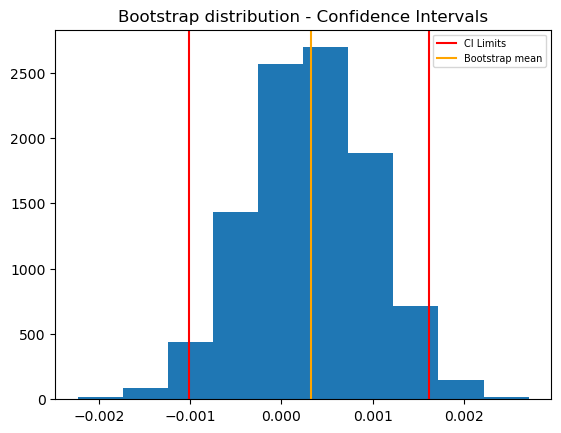

In [81]:
# Defining Confidence Interval limits 
l_ci = np.quantile(bootstrap_pr, 0.025)
u_ci = np.quantile(bootstrap_pr, 0.975)

# Plot
plt.hist(bootstrap_pr)
plt.axvline(l_ci, color='red', label=l_ci)
plt.axvline(bootstrap_pr.mean(), color='orange')
plt.axvline(u_ci, color='red', label=u_ci)
plt.title('Bootstrap distribution - Confidence Intervals')
plt.legend(['CI Limits', 'Bootstrap mean'], prop={'size':7})
print(f'Bootstrap Mean: {bootstrap_dr.mean()}\nConfidence Interval: {l_ci, u_ci}')
plt.show()

### INSIGHT

With the confidence interval provided above, we can already infere that there is NOT a significance difference between both groups for the evaluation metric. **In other words, we can't reject the null hypothesis:**

\begin{equation*}
H_0 : PurchaseRate\: Experiment <= PurchaseRate\: Control \\
\end{equation*}

Therefore, failing to reject the idea that $H_0$ is true, we can look at the sampling distribution of the difference in average download rate between the groups. The mean of this distribution should be at 0 (as there is no difference between both groups) and the standard deviation is same as the bootstrapped sample. The bootstrap mean should be close regarding the normal distribution with mean 0 (as we expect significant difference)

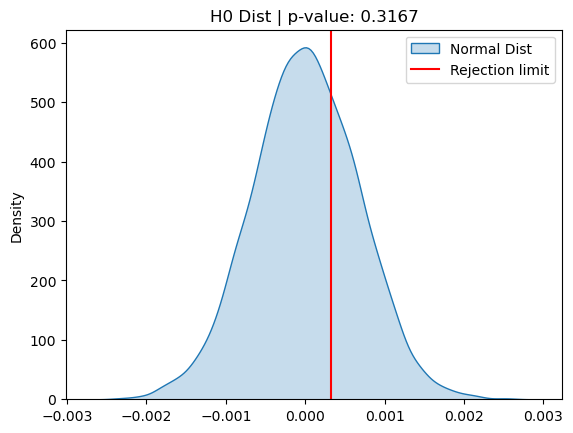

In [83]:
# Setting up variables for normal distribution
h0_mean = 0
h0_std = bootstrap_pr.std()
h0_sample = np.random.normal(loc=h0_mean, scale = h0_std, size = bootstrap_pr.size)
p_value = (h0_sample > bootstrap_pr.mean()).mean()

sns.kdeplot(h0_sample, fill=True)
plt.axvline(bootstrap_pr.mean(), color='red')
plt.title(f'H0 Dist | p-value: {p_value}')
plt.legend(['Normal Dist','Rejection limit'])
plt.show()

### CONCLUSION

It is clear from the above plot that the p-value of the test is greater tgab the statistical significance bound (alpha) and hence we fail to reject the null hypothesis. 

**In other words, the difference in the purchase rate due to the modifications introduced in the homepage of the website is NOT statistically significant.**

----
# T-TEST: Additional approach 

The advantage of the bootstrap is that it can estimate the sampling distribution without many of the assumptions needed by parametric methods. It works for statistics other than the mean and in cases where other assumptions do not hold (e.g. 2 samples, unequal variances). The disadvantage of the bootstrap is that it is very dependent on the sample representing population because it does not have the advantages of other assumptions. The bootstrap does not give you normality, it gives you the sampling distribution (which sometimes looks normal, but still works when it is not) without needing the assumptions about the population.

The advantage of the t-test is that if all the assumptions hold (or are close) then it works well (I think it is actually the uniformly most powerful test). The disadvantage is that it does not work well if the assumptions are not true (and not close to being true) and there are some cases where the assumptions make a bigger differences than in others. And the t-test theory does not apply for some parameters/statistics of interest, e.g. trimmed means, standard deviations, quantiles, etc.

In [85]:
# Adding two columns:  

df['DR Control'] = df['Control Downloads']/df['Control Cookies']
df['DR Experiment'] = df['Experiment Downloads']/df['Experiment Cookies']
df.head()


,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses,DR Control,DR Experiment
0,1,1764,246,1,1850,339,3,0.139456,0.183243
1,2,1541,234,2,1590,281,2,0.151849,0.176730
2,3,1457,240,1,1515,274,1,0.164722,0.180858
3,4,1587,224,1,1541,284,2,0.141147,0.184296
4,5,1606,253,2,1643,292,3,0.157534,0.177724


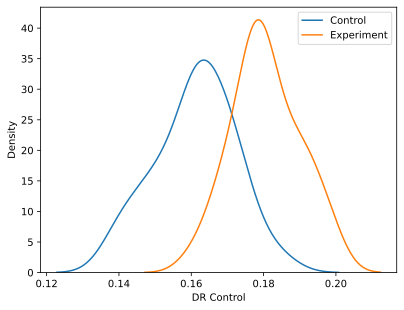

In [95]:
sns.kdeplot(df['DR Control'])
sns.kdeplot(df['DR Experiment'])
plt.legend(['Control', 'Experiment'])
plt.show()

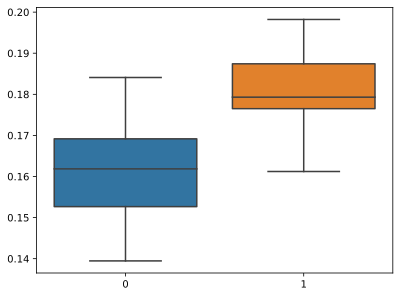

In [96]:
sns.boxplot(data=[df['DR Control'], df['DR Experiment']])
plt.show()

In [97]:
alpha = 0.05

In [101]:
# Download Rate significant difference: p_value < alpha. Reject H0

r = sp.stats.ttest_ind(df['DR Experiment'], df['DR Control'])
print(r)
print('p_value: ', r.pvalue/2) # One tail test
print(r.pvalue/2 < alpha)

Ttest_indResult(statistic=7.3912585334754715, pvalue=7.807267675005538e-10)
p_value:  3.903633837502769e-10
True


In [102]:
# Adding Purchase Rate columns

df['PR Control'] = df['Control Licenses']/df['Control Cookies']
df['PR Experiment'] = df['Experiment Licenses']/df['Experiment Cookies']
df.head()


,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses,DR Control,DR Experiment,PR Control,PR Experiment
0,1,1764,246,1,1850,339,3,0.139456,0.183243,0.000567,0.001622
1,2,1541,234,2,1590,281,2,0.151849,0.176730,0.001298,0.001258
2,3,1457,240,1,1515,274,1,0.164722,0.180858,0.000686,0.000660
3,4,1587,224,1,1541,284,2,0.141147,0.184296,0.000630,0.001298
4,5,1606,253,2,1643,292,3,0.157534,0.177724,0.001245,0.001826


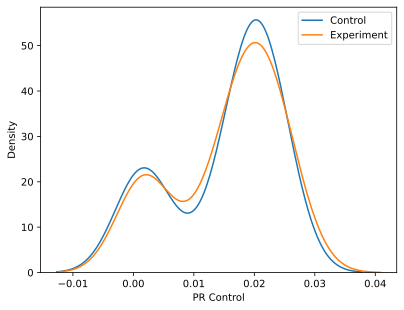

In [103]:
sns.kdeplot(df['PR Control'])
sns.kdeplot(df['PR Experiment'])
plt.legend(['Control', 'Experiment'])
plt.show()

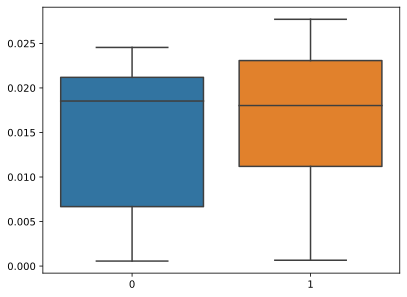

In [104]:
sns.boxplot(data=[df['PR Control'], df['PR Experiment']])
plt.show()

In [93]:
# Not significant difference (fail to reject H0)

r = sp.stats.ttest_ind(df['PR Control'], df['PR Experiment'], equal_var=False)
print(r)
print(r.pvalue/2) # One tail test
print(r.pvalue < alpha)

Ttest_indResult(statistic=-0.1645604206394187, pvalue=0.8698825622173222)
0.4349412811086611
False


In [94]:
r = sp.stats.ttest_ind(df['Control Cookies'], df['Experiment Cookies'], equal_var=False)
print(r.pvalue)
print(r.pvalue < alpha)

0.5731368706500026
False


---
# OVERALL CONCLUSION

Based on all the analysis presented above, the new homepage of the website has a **strong effect on the metric Download Rate.**

On the other hand, the Purchase Rate does not show up any statistically significant effect. Recall that Adobe Company decided to deploy the new homepage layout even if one of the two evaluation metrics appears to be statiscally significant.

Therefore I will go ahead, communicate these insights with the Product Team and PM to proceed the deploymentprocess. 

To summarize: The new homepage do encourage more visitors to go to the download page and try out the software. But not many of them come back to purchase it as we would have wanted them to. There could be various reasons for that. The present collected data do not actually tell us much about individual user. After deploying the changes, we might want to collect more detailed data about the website visitors to understand how can we further improve the purchase rate.